# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the "correct" name

In [48]:
df = pd.read_csv("animals.csv")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [49]:
df = pd.read_csv('animals.csv')
df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35


In [50]:
df.columns

Index(['animal', 'name', 'length'], dtype='object')

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but not the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [51]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [52]:
df.sort_values(by='length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [53]:
df.groupby(['animal'])['length'].describe()

,count,mean,std,min,25%,50%,75%,max
animal,,,,,,,,
cat,3.0,37.333333,6.806859,32.0,33.5,35.0,40.0,45.0
dog,3.0,50.000000,15.000000,35.0,42.5,50.0,57.5,65.0


## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [54]:
df['animal'].value_counts()

cat    3
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [55]:
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [56]:
df[df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [57]:
df['inches'] = df['length'] * 0.3937
df.head()

,animal,name,length,inches
0,cat,Anne,35,13.7795
1,cat,Bob,45,17.7165
2,dog,Egglesburg,65,25.5905
3,dog,Devon,50,19.6850
4,cat,Charlie,32,12.5984


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [58]:
dogs = df[df['animal'] == 'dog']
cats = df[df['animal'] == 'cat']

## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [59]:
cats[cats['inches'] > 12]

,animal,name,length,inches
0,cat,Anne,35,13.7795
1,cat,Bob,45,17.7165
4,cat,Charlie,32,12.5984


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [60]:
df[df['animal'] == 'cat'].describe()

,length,inches
count,3.000000,3.000000
mean,37.333333,14.698133
std,6.806859,2.679861
min,32.000000,12.598400
25%,33.500000,13.188950
50%,35.000000,13.779500
75%,40.000000,15.748000
max,45.000000,17.716500


In [61]:
df[df['animal'] == 'dog'].describe()

,length,inches
count,3.0,3.00000
mean,50.0,19.68500
std,15.0,5.90550
min,35.0,13.77950
25%,42.5,16.73225
50%,50.0,19.68500
75%,57.5,22.63775
max,65.0,25.59050


## 13) If you didn't already, use `groupby` to do #12 all at once

In [62]:
df.groupby(['animal']).describe()

inches                                                             \
        count       mean       std      min       25%      50%       75%   
animal                                                                     
cat       3.0  14.698133  2.679861  12.5984  13.18895  13.7795  15.74800   
dog       3.0  19.685000  5.905500  13.7795  16.73225  19.6850  22.63775   

                length                                                      
            max  count       mean        std   min   25%   50%   75%   max  
animal                                                                      
cat     17.7165    3.0  37.333333   6.806859  32.0  33.5  35.0  40.0  45.0  
dog     25.5905    3.0  50.000000  15.000000  35.0  42.5  50.0  57.5  65.0

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7236f4c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7408a2c>]], dtype=object)

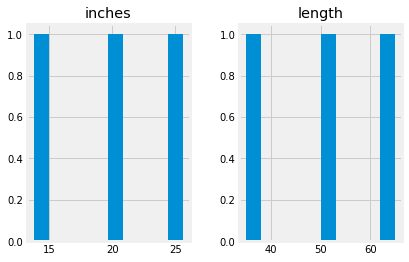

In [63]:
df[df['animal'] == 'dog'].hist()

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** You can set a custom size for your plot by sending it something like `figsize=(2,15)`

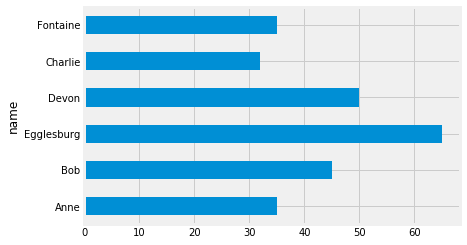

In [64]:
df.plot(kind='barh', x='name', y='length', legend=False)

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

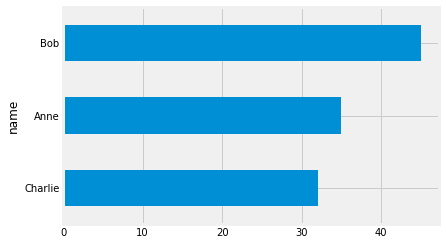

In [65]:
cats_sorted = cats.sort_values(by='length', ascending=True).head(3)
cats_sorted.plot(kind='barh', x='name', y='length', legend=False)

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

In [66]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

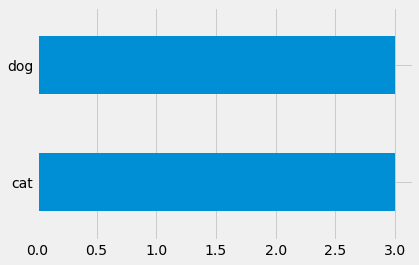

In [67]:
df['animal'].value_counts().head().plot(kind = 'barh')